In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn import linear_model, preprocessing, model_selection

In [3]:
iron = pd.read_csv('ironslag.csv')
iron.head()

,chemical,magnetic
0,24,25
1,16,22
2,24,17
3,18,21
4,18,20


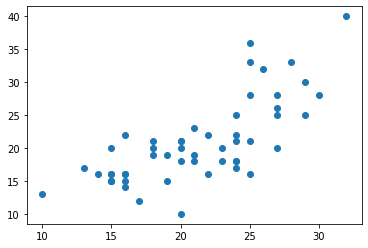

In [4]:
plt.scatter(iron.chemical, iron.magnetic)

In [5]:
# sklearn requires our predictor variables to be in a two dimensional array
# reshape to have 1 column
# the -1 in reshape means I don't want to figure out all the necessary dimensions
# i want 1 column, and numpy, you figure out how many rows I need
X = iron.chemical.values.reshape(-1,1)
X.shape

(53, 1)

In [6]:
y = iron.magnetic
y.shape

(53,)

In [7]:
np.corrcoef(iron.chemical.values, iron.magnetic.values)[0,1] ** 2

0.5372284817291435

# Fit a linear model between x and y

In [8]:
linear = linear_model.LinearRegression()

In [9]:
linear.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
# linear.score is the R^2 value
# how much error is reduced from no model (variance or MSE)
# vs having the regression model
linear.score(X,y)

0.5372284817291438

In [11]:
x_predict = np.arange(10,33).reshape(-1,1)

In [12]:
lin_y_hat = linear.predict(x_predict)

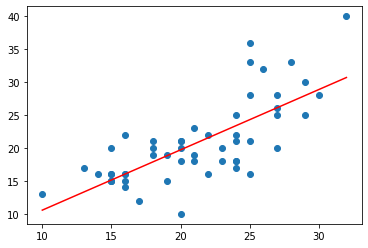

In [13]:
plt.scatter(X,y)
plt.plot(x_predict, lin_y_hat, c = 'red')

### Cross Validation

In [14]:
# shuffle split says 'shuffle the data' and split it into 5 equal parts
cv = model_selection.ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cv_linear = model_selection.cross_val_score(linear, X, y, cv = cv)
print(cv_linear)
print(np.mean(cv_linear))

[-0.00864948  0.49324604  0.7561827   0.65164508  0.41240001]
0.4609648694311022


Technically, the above is all you need to do. But I went ahead and wrote this loop which fits the model on the training data, and makes predictions for the validation data. 

In each plot, the light blue dots are the training data.

The green dots are the validation data.

The flat green line is the mean of the validation data. That would be the prediction if no model was fit.

The red line is the linear model that was trained on the training data. We hope that the red line does a better job of predicting the green points than the green line. In some cases, it does not, and we actually get a negative cross-validation score.

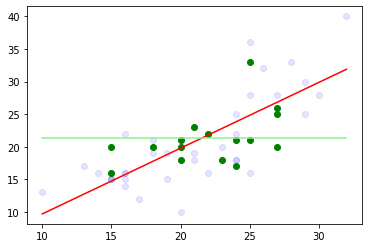

15.71484375
15.850769002703505
-0.008649481653516576


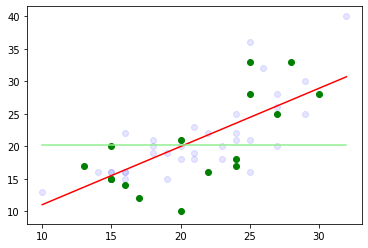

48.734375
24.696337639929297
0.4932460375262985


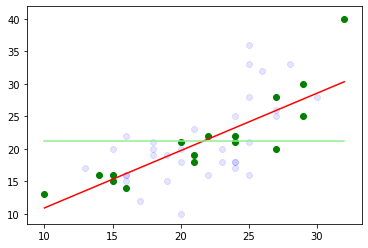

45.0625
10.987016858823484
0.7561827049359561


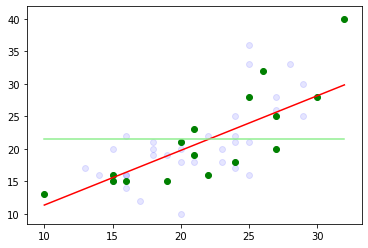

52.0
18.11445590073139
0.6516450788320888


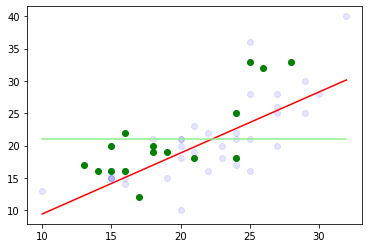

39.125
22.989849705987965
0.4124000075146846


In [15]:
for train_index, test_index in cv.split(X):
    # create a subset of the data using the training cases in cross validation
    tX = X[train_index, : ]
    ty = y[train_index]
    
    # initialize and fite a new linear regression model
    clin = linear_model.LinearRegression()
    
    # fit only on the training cases
    clin.fit(tX, ty)
    
    # create a subset for the test cases
    testX = X[test_index, :]
    testy = y[test_index]
    
    # plot the training data in blue and test cases in green
    plt.scatter(tX,ty, c = 'blue', alpha = 0.1)
    plt.scatter(testX, testy, c = 'green')
    
    # plot the fitted prediction line based on the training data
    plt.plot(x_predict, clin.predict(x_predict), c = 'red')
    
    # plot the mean of the test cases to show what having no model looks like
    plt.plot(x_predict, np.repeat(np.mean(testy), len(x_predict)), c = 'lightgreen')
    
    plt.show()
    
    # the MS of having no model = variance of the test data
    mse = np.var(testy)
    print(mse)
    
    # the MS regression
    msr = sum((testy - clin.predict(testX))**2)/len(testy)
    print( msr )
    
    # the score is the proportion of reduction by having regression
    red = (mse - msr)/mse
    print(red)

# Polynomial fit - quadratic

In [16]:
# preprocessing polynomial features creates a polynomial based on X
poly2 = preprocessing.PolynomialFeatures(2)

In [17]:
polyX = poly2.fit_transform(X)

In [18]:
poly2reg = linear_model.LinearRegression(fit_intercept = False)

In [19]:
poly2reg.fit(polyX, y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [20]:
poly2reg.score(polyX,y)

0.5930914623133827

In [21]:
poly2_X_new = poly2.fit_transform(x_predict)
poly2_y_hat = poly2reg.predict(poly2_X_new)

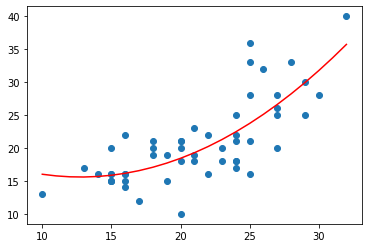

In [22]:
plt.scatter(X,y)
plt.plot(x_predict, poly2_y_hat, c = 'red')

In [23]:
cv_quad = model_selection.cross_val_score(poly2reg, polyX, y, cv=cv)
print(cv_quad)
print(np.mean(cv_quad))

[-0.01033304  0.55387464  0.79903733  0.71241268  0.46294048]
0.5035864176996194


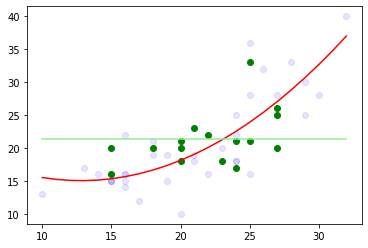

15.71484375
15.877225936396778
-0.010333044921097484


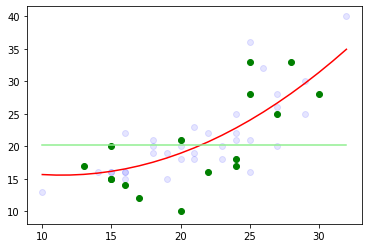

48.734375
21.74164036245968
0.5538746446946394


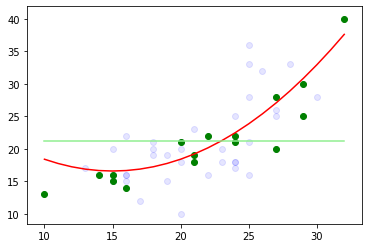

45.0625
9.05588038676949
0.7990373284489434


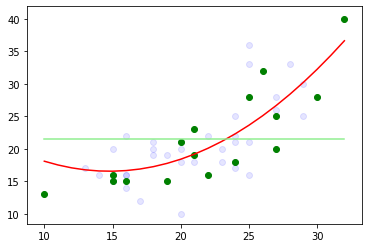

52.0
14.954540714430761
0.7124126785686392


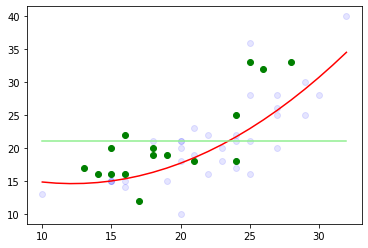

39.125
21.01245365321686
0.4629404817069173


In [24]:
def polycv(degree, X, y, train_index, test_index):
    
    # create a subset of the data using the training cases in cross validation
    tX = X[train_index, : ]
    ty = y[train_index]
    
    # create a subset for the test cases
    testX = X[test_index, :]
    testy = y[test_index]
    
    poly = preprocessing.PolynomialFeatures(degree)
    polytX = poly.fit_transform(tX)
    
    # initialize and fite a new linear regression model
    clin = linear_model.LinearRegression()
    
    # fit only on the training cases
    clin.fit(polytX, ty)
    
    # plot the training data in blue and test cases in green
    plt.scatter(tX,ty, c = 'blue', alpha = 0.1)
    plt.scatter(testX, testy, c = 'green')
    
    # plot the fitted prediction line based on the training data
    plt.plot(x_predict, clin.predict(poly.fit_transform(x_predict)), c = 'red')
    
    # plot the mean of the test cases to show what having no model looks like
    plt.plot(x_predict, np.repeat(np.mean(testy), len(x_predict)), c = 'lightgreen')
    
    plt.show()
    
    # the MS of having no model = variance of the test data
    mse = np.var(testy)
    print(mse)
    
    # the MS regression
    msr = sum((testy - clin.predict(poly.fit_transform(testX)))**2)/len(testy)
    print( msr )
    
    # the score is the proportion of reduction by having regression
    red = (mse - msr)/mse
    print(red)

for train_index, test_index in cv.split(X):
    polycv(2, X, y, train_index, test_index)

# cubic fit

In [25]:
poly3 = preprocessing.PolynomialFeatures(3)

In [26]:
poly3X = poly3.fit_transform(X)
poly3reg = linear_model.LinearRegression(fit_intercept = False)
poly3reg.fit(poly3X, y)
print(poly3reg.score(poly3X,y))

0.5986142015688561


The R^2 value of the cubic fit is better, but we will see with cross validation that it is not a better model. It is overfitting our data.

In [27]:
poly3_X_new = poly3.fit_transform(x_predict)
poly3_y_hat = poly3reg.predict(poly3_X_new)

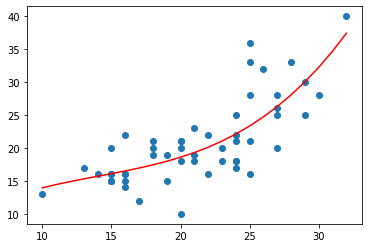

In [28]:
plt.scatter(X,y)
plt.plot(x_predict, poly3_y_hat, c = 'red')

In [29]:
cv_cube = model_selection.cross_val_score(poly3reg, poly3X, y, cv=cv)
print(cv_cube)
print(np.mean(cv_cube))

[0.01754203 0.51242821 0.62467447 0.67155776 0.44961693]
0.45516388022604926


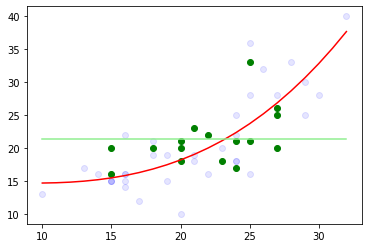

15.71484375
15.439173460741587
0.017542031829518676


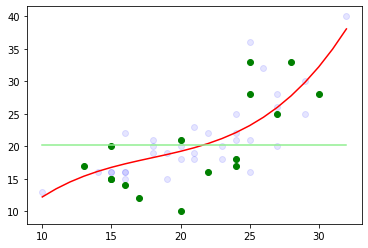

48.734375
23.76150641939477
0.5124282106953302


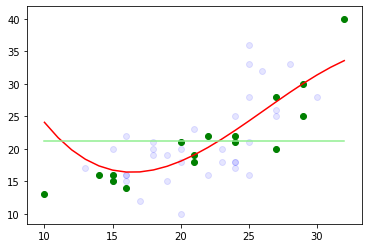

45.0625
16.91310691642025
0.624674465100244


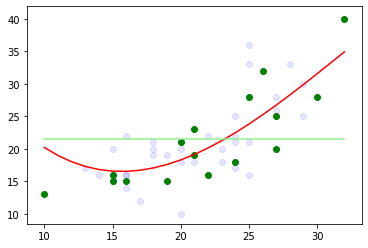

52.0
17.078996509889915
0.6715577594251939


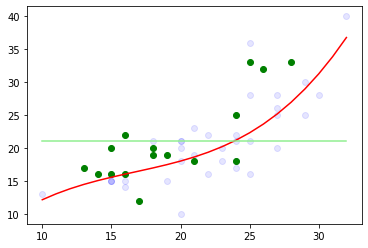

39.125
21.53373745416842
0.4496169340787624


In [30]:
for train_index, test_index in cv.split(X):
    polycv(3, X, y, train_index, test_index)

# fitting higher order polynomials:

In [31]:
# degree4
poly4 = preprocessing.PolynomialFeatures(4)
poly4X = poly4.fit_transform(X)
poly4reg = linear_model.LinearRegression(fit_intercept = False)

cv_4th = model_selection.cross_val_score(poly4reg, poly4X, y, cv=cv)
print(cv_4th)
print(np.mean(cv_4th))

[-0.04431898  0.49170606  0.05220736  0.19770602  0.39371904]
0.21820390256193606


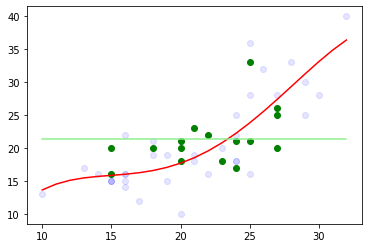

15.71484375
16.411309553251666
-0.04431897728869662


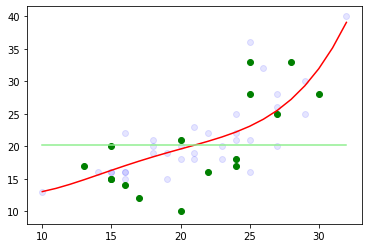

48.734375
24.771387412884753
0.4917060614220506


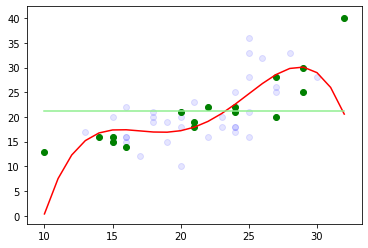

45.0625
42.70990565609312
0.052207364081151286


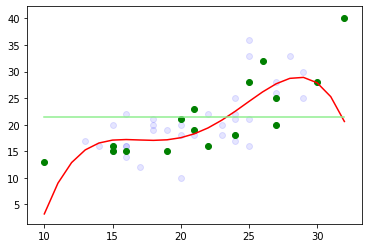

52.0
41.719286915959685
0.19770602084692912


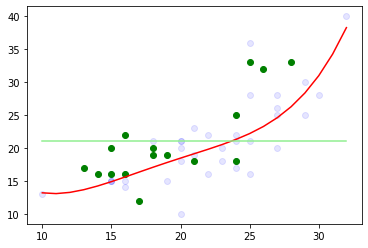

39.125
23.72074244847292
0.39371904285053244


In [32]:
for train_index, test_index in cv.split(X):
    polycv(4, X, y, train_index, test_index)

In [33]:
# degree 5
poly5 = preprocessing.PolynomialFeatures(5)
poly5X = poly5.fit_transform(X)
poly5reg = linear_model.LinearRegression(fit_intercept = False)

cv_5th = model_selection.cross_val_score(poly5reg, poly5X, y, cv=cv)
print(cv_5th)
print(np.mean(cv_5th))

[-0.10318001  0.50260092 -1.862348   -5.73793147  0.42066724]
-1.3560382625111616


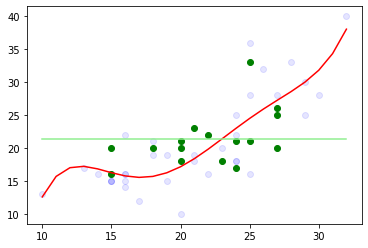

15.71484375
17.33630143566788
-0.10318000684339487


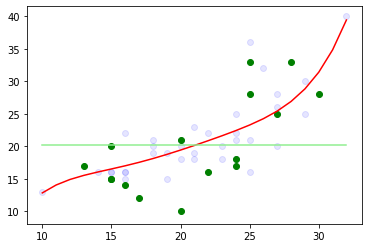

48.734375
24.24043338106855
0.5026009181185036


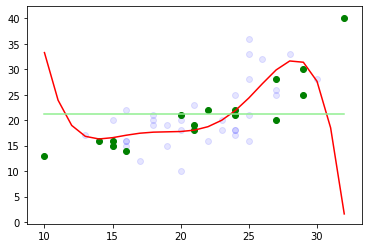

45.0625
128.98455726021712
-1.8623480113224324


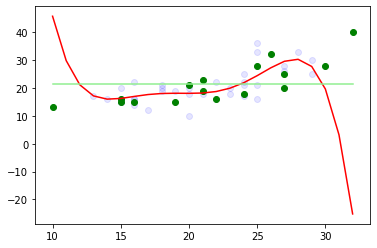

52.0
350.3724429154299
-5.737931594527497


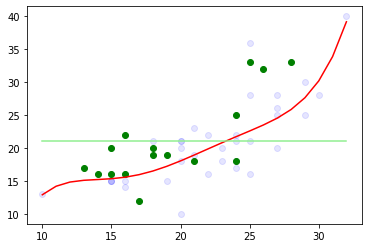

39.125
22.666394629719385
0.42066722991132566


In [34]:
for train_index, test_index in cv.split(X):
    polycv(5, X, y, train_index, test_index)